In [1]:
%matplotlib inline

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from scipy.cluster.hierarchy import linkage, dendrogram

# Clustering
### Finding clumps in data


<strong>Unsupervised learning</strong>

Discover hidden structures in data where we don't know the right answer upfront

<strong>Clustering</strong>

Find a natural grouping in data such that items in the same cluster

are more similar to each other than those from different clusters

<strong>Some applications:</strong>

Medicine: classify different types of tissues

Marketing: group similar products

Image segmentation, object recognition

Social network analysis

Crime analysis: "hot" spatial areas; similar crimes


## k-Means Clustering


Prototype-based algorithm (За да може да започне работа, той взима първоначални прототипи/точки на клъстерите)

Each cluster is represented by a "prototype" data point

As opposed to density-based

<strong>Algorithm:</strong>

- Select 𝑘 – number of clusters

- Randomly pick 𝑘 samples as "initial centroids" (Казваме центроид защото клъстера не е в една равнина а е някаква част от многомерно пространство)

- Repeat until convergence (change in centers < tolerance):

- Assign each sample to the nearest (using a distance metric) centroid

- Move the centroids to the center of the newly created clusters

Сигурно е, че алгоритъма ще завърши

<strong>Advantages</strong>: fast, simple, good for "spherical" clusters

<strong>Disadvantages</strong>: we need to specify 𝑘, doesn't work too well

with overlapping or hierarchical clusters

<strong>Objective function</strong>

Minimize the cluster inertia

Within-cluster sum of squared errors (Euclidean distances)
uj е средното на всеки един центроид, C е множество от всички центроиди
разстоянието на  всяка една точка xi до всеки един центроид uj 

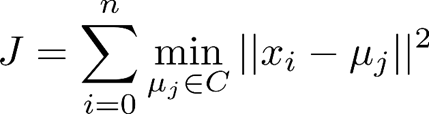


In [3]:
attributes, clusters = make_blobs(n_samples = 200) # we can use scikit-learn to generate "blobs" (clusters)
# blobs има x, y координати на всяка една точка
# blob_clusters има номерче на клъстера, в който се наммира точката

In [4]:
def plot(attributes, clusters):
    plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
    # от attributes [:, 0] всичките първи координати и [:, 1] всичките втори
    # c - color
    plt.gca().set_aspect("equal") # еднакво разпределение по осите
    plt.show()

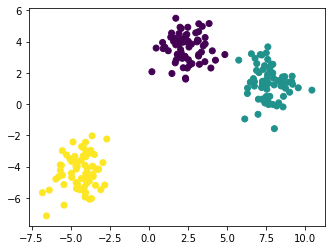

In [5]:
plot(attributes, clusters)

In [6]:
clusters

array([0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1,
       0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1,
       0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1,
       2, 2])

In [7]:
k_means = KMeans(n_clusters = 3, init = "random") # n_clusters задължително се задава

In [8]:
k_means.fit(attributes)

KMeans(init='random', n_clusters=3)

In [9]:
predictions = k_means.predict(attributes)
# не сравнявай accuracy score между attributes и clusters 

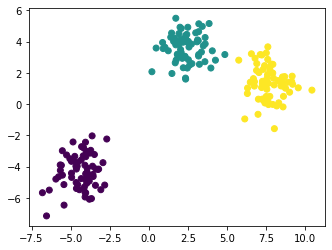

In [10]:
plot(attributes, predictions)

In [11]:
attributes_mixed, clusters_mixed = make_blobs(centers = [(1, 1), (2, 2.5), (1.1, 1.2)], cluster_std = 0.5)

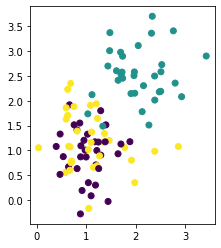

In [12]:
plot(attributes_mixed, clusters_mixed)

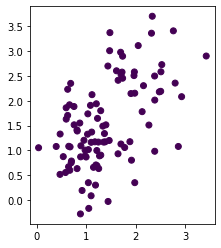

In [13]:
plot(attributes_mixed, [0] * len(attributes_mixed)) # това вижда алгоритъма

In [14]:
k_means_mixed = KMeans(n_clusters = 3, init = "random")
k_means_mixed.fit(attributes_mixed)
predictions_mixed = k_means.predict(attributes_mixed)

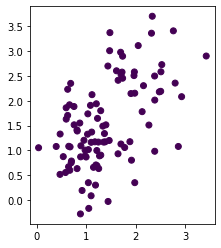

In [15]:
plot(attributes_mixed, predictions_mixed)

### Example: k-Means Clustering

Generate several datasets

Blobs, circles, moons

Apply k-means clustering to each dataset

Display the original clusters and the clustering results

How do they differ? Can you explain why?

In [16]:
moons_attributes, moon_clusters = make_moons(n_samples = 200, noise = 0.07)

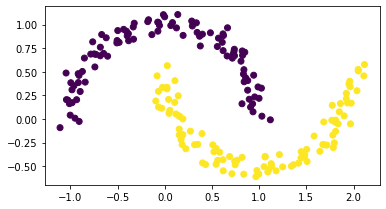

In [17]:
plot(moons_attributes, moon_clusters)

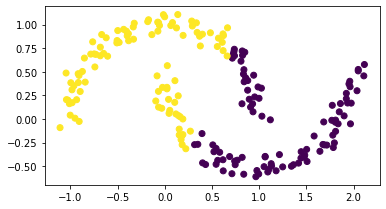

In [18]:
k_means_moons = KMeans(n_clusters = 2)
k_means_moons.fit(moons_attributes)
moons_predictions = k_means_moons.predict(moons_attributes)

plot(moons_attributes, moons_predictions)

In [19]:
k_means_moons.cluster_centers_

array([[ 1.20257242, -0.05108066],
       [-0.21845949,  0.54836215]])

In [21]:
circles_attributes, circle_clusters = make_circles(factor = 0.2, noise = 0.1)

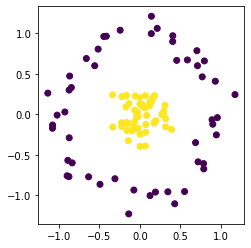

In [22]:
plot(circles_attributes, circle_clusters)

In [23]:
#KMeans ще се изложи
k_means_circles = KMeans(n_clusters = 2)
k_means_circles.fit(circles_attributes)
circles_predictions = k_means_circles.predict(circles_attributes)

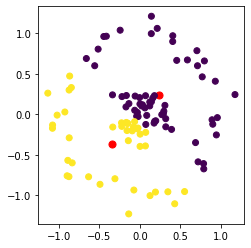

In [28]:
plt.scatter(k_means_circles.cluster_centers_[:, 0], k_means_circles.cluster_centers_[:, 1], c = "r", s = 50)
plot(circles_attributes, circles_predictions)

In [47]:
attributes, clusters = make_blobs(center_box = [-1, 1], cluster_std = 0.5) # по-близки центроиди

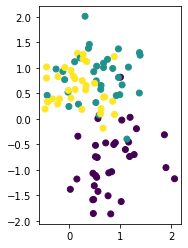

In [48]:
plot(attributes, clusters)

In [49]:
attributes_transformed = attributes @ np.array([[1.5, 1.5], [0.2, 1.5]]) # @ - матрично умножение в numpy

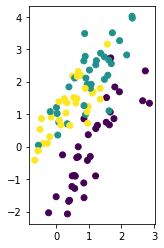

In [50]:
plot(attributes_transformed, clusters)

In [51]:
k_means = KMeans(n_clusters = 3)
k_means.fit(attributes_transformed)
predictions = k_means.predict(attributes_transformed)

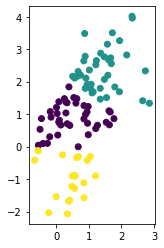

In [53]:
plot(attributes_transformed, predictions) # колкото повече проблеми има в данните, толкова повече в клъстерирането

## K-Means++

Решава проблема с инициализацията, като от ново взема на случаен принцип всяка една точка обаче с нерамномерно разпределение. 

Random initial seed ⇒ may lead to poor performance

- If the initial points aren't placed well enough or if the clusters are too "mixed"

k-Means++ uses centers which are far away from each other

- Instead of random initialization

<strong>Algorithm</strong>
- Choose the first centroid uniformly at random

- To choose the next centroids, use a weighted probability distribution

- Based on all currently selected centroids

- Further away ⇒ greater probability

- After all centroids have been initialized, proceed as usual


In [54]:
k_means = KMeans(n_clusters = 3, init="k-means++") # "k-means++" е по default, използвай "random" само ако има конкретна причина
k_means.fit(attributes_transformed)
predictions = k_means.predict(attributes_transformed)

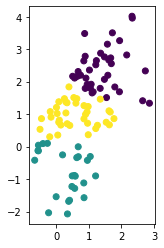

In [55]:
plot(attributes_transformed, predictions)

## Finding an Optimal Number of Clusters

<strong>Elbow method</strong> – graphical

Inertia is a measure of clustering quality

- Like grid search, initialize KMeans with a range of 𝑘 values

- Fit and calculate the inertia (given by default in scikit-learn)

- Plot inertia vs. number of clusters (еднакъв брой клъстери колкото са точките -> инерцията ще бъде 0, ако имаме само един клъстер инерцията ще бъде средното разстояние между точките)

- Find the "elbow point" of the plot – optimal 
  - Inertia always decreases but some models overfit the data
 

In [56]:
k_means.inertia_ 

68.97429444875047

In [57]:
attributes, clusters = make_blobs(center_box = [-5, 5], cluster_std = 0.5)

In [63]:
num_clusters = []
inertias = []
for k in range(1, 11):
    k_means = KMeans(n_clusters = k)
    k_means.fit(attributes)
    
    num_clusters.append(k)
    inertias.append(k_means.inertia_)

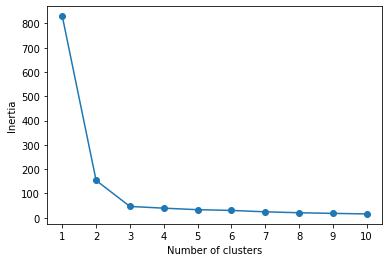

In [72]:
plt.scatter(num_clusters, inertias)
plt.plot(num_clusters, inertias)
plt.xticks(range(1, max(num_clusters) + 1))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Когато правата е съвсем гладка - алгоритъмът не работи добре

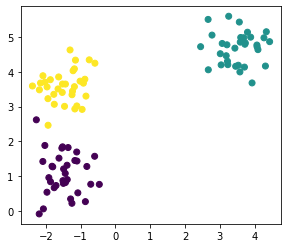

In [73]:
plot(attributes, clusters)

## Evaluating Clustering Quality

<strong>Silhouette analysis</strong> – graphical

Use cluster cohesion (within-cluster distance) and cluster separation (between-cluster distance) to calculate the silhouette coefficient for each observation

- [−1; 1], 0 if the two distances are equal, 1 – ideal, −1 – worst

Usage – import from scikit-learn and plot (example)

from sklearn.metrics import silhouette_samples

Interpretation

- Each color is a separate cluster
- All silhouettes should be close to 1 (these are similar to bar charts)
- All silhouettes have a similar "depth" and "width" (if they don't ⇒ suboptimal clustering)

Силуетен плот:

отношението на разстоянието най-близкия клъстер и втория най-близък клъстер

много на брой точки с много дълъг барчарт, който отговаря за нея - подреждат се от на-големия към най-малкия коефициент

колкото по-близо до 1 толкова по-добре

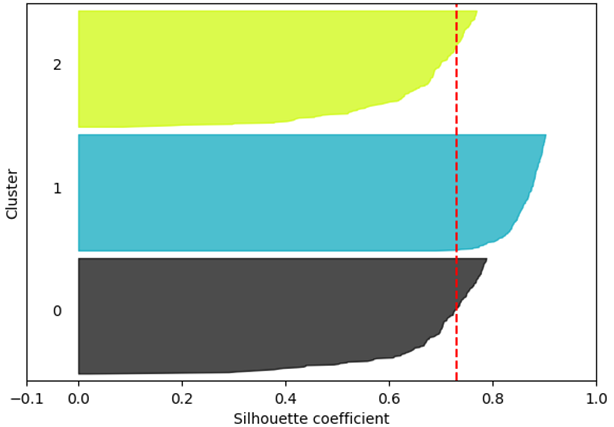

## Hierarchical Clustering

Another prototype-based clustering

Advantage – allows us to plot dendrograms

- Visualizations of binary hierarchical clustering

- Allow us to interpret the results

<strong>Algorithm</strong>

- Compute the distance matrix (distances between any two points)

- Start with each point at its own cluster

- Repeat until only one cluster is left:

- Merge the two closest clusters and update the distances

- Update the distance matrix

- In scikit-learn, linkage describes the selected distance metric

Агломерация означава сбор - взима всяка една точка и я добавя в собствен клъстер(имаме толкова на брой точки колкото са и клъстери), след това най-близките две ги обединява в един клъстер и това се повтаря докато не получим един клъстер с всички точки

from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering(n_clusters = 3, linkage = "complete") linkage - мярка за свързване


In [74]:
aggl = AgglomerativeClustering(n_clusters = 3)

In [75]:
aggl.fit(attributes)

AgglomerativeClustering(n_clusters=3)

In [78]:
aggl_clusters = aggl.fit_predict(attributes) # може само комбинация от fit и predict 

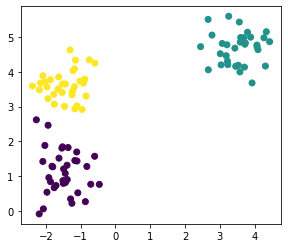

In [79]:
plot(attributes, aggl_clusters)

In [76]:
aggl.children_ # списък на съседите

array([[ 21,  89],
       [ 49,  53],
       [ 37,  68],
       [ 24,  93],
       [ 18,  25],
       [ 51,  72],
       [ 59,  63],
       [  9,  74],
       [ 84,  98],
       [ 12,  69],
       [ 36,  71],
       [ 62, 105],
       [ 30,  77],
       [ 64,  92],
       [ 35,  61],
       [  4,  10],
       [ 34,  47],
       [  7, 103],
       [ 52,  96],
       [  6,  33],
       [ 23,  31],
       [ 97, 115],
       [ 38,  56],
       [ 22, 111],
       [  8,  20],
       [ 54, 110],
       [ 26,  95],
       [  0,  50],
       [ 55,  58],
       [ 17,  67],
       [ 13,  27],
       [ 11,  45],
       [ 39, 102],
       [ 32, 119],
       [ 15,  16],
       [ 73, 120],
       [ 94, 114],
       [ 14, 113],
       [ 60, 112],
       [ 57,  78],
       [ 66,  81],
       [ 19,  70],
       [101, 125],
       [107, 131],
       [ 44, 128],
       [ 42, 134],
       [ 40, 104],
       [ 90, 109],
       [133, 140],
       [  3, 106],
       [ 80, 108],
       [  2,  85],
       [ 76,

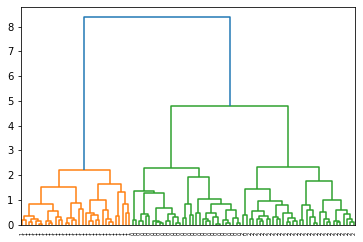

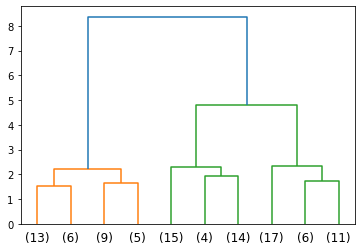

In [81]:
# по x имаме всяка една точка и можем да видим в кой момент тя се е присъединила към другите
row_clusters = linkage(attributes, method = "complete", metric = "euclidean")
dendrogram(row_clusters, labels = clusters)
plt.show()

# Show only the last 10 merged clusters
# дендрос означава дърво
dendrogram(row_clusters, labels = clusters, truncate_mode = "lastp", p = 10)
plt.show()

## DBSCAN

Първо предполага че имаме шум/outliers в данните - те няма да получат клъстериране

Density-based Spatial Clustering of Applications with Noise

Label all points as "core points" or "noise points"

- Core point: has at least 𝑚 points within radius 𝜀 (радиус на действие)

Use core points to create clusters

DBSCAN vs. k-means

- Noise points are not assigned to any cluster

- Does not assume spherical shape

<strong>Disadvantages</strong>: "curse of dimensionality", the hyperparameters need to be optimized

Usage – like every other clustering algorithm

from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2, min_samples = 5, metric = "euclidean")

In [89]:
dbscan = DBSCAN(eps = 0.5, min_samples = 10) 
# eps - определя кои са core points и къде имаме outliers спрямо тях
# min_samples решава дали точките са комбинация от outliers или са един нов клъстер
dbscan.fit(attributes)

DBSCAN(min_samples=10)

In [90]:
dbscan.core_sample_indices_ # inliers

array([ 0,  6,  8, 10, 12, 14, 16, 20, 22, 23, 30, 31, 32, 34, 36, 43, 47,
       49, 51, 53, 54, 62, 63, 64, 66, 69, 71, 72, 73, 84, 88, 89, 90, 92,
       93, 95, 99], dtype=int64)

In [91]:
dbscan.components_ # предишните компоненти на алгоритъма 

array([[ 3.18528499,  4.46037066],
       [-2.0229274 ,  3.70224569],
       [-1.64896161,  3.50570408],
       [-1.01497343,  3.72953241],
       [-1.43618811,  3.64620484],
       [-1.17803243,  3.5712247 ],
       [-1.76981286,  3.35098812],
       [-1.5278623 ,  3.40534463],
       [-1.38417374,  0.90052239],
       [-1.48842407,  1.2066344 ],
       [ 3.22182484,  4.30167609],
       [-1.44164856,  1.0778019 ],
       [-1.96468697,  3.56321371],
       [-1.86451742,  0.83832855],
       [ 3.69016302,  4.97746614],
       [-1.6217671 ,  1.51682516],
       [-1.91289099,  0.95604579],
       [ 3.73454302,  4.82895912],
       [-1.43576075,  0.81531186],
       [ 3.72286832,  4.79068816],
       [ 3.58928111,  4.85111433],
       [-1.50817732,  0.86971848],
       [-1.21642588,  4.02985563],
       [-1.23325825,  3.44203802],
       [-1.86988241,  3.77147169],
       [-1.52066512,  3.64762691],
       [ 3.60243636,  4.98479263],
       [-1.49584862,  0.79075935],
       [-1.38926648,

In [92]:
dbscan_clusters = dbscan.fit_predict(attributes) # -1 означава, че тази точка си няма клъстер

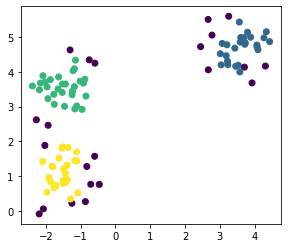

In [93]:
plot(attributes, dbscan_clusters)

### Clustering comparison in scikit-learn (https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

Conclusion

It's not always obvious which algorithm performs best on a dataset

- Especially if data comes in many dimensions

A successful clustering depends on the algorithm and its hyperparameters

We need to choose an appropriate distance metric

We need some domain knowledge

## Clustering and Classification

Sometimes, classification tasks can be reduced to clustering tasks

- Most trivially: just ignore the labels

    - Assumption: The data is easily (e.g. linearly) separable
    
- The opposite is also true: we may be able to find a function that assigns a label to each data point
    - This is exactly what clustering does
We can apply and compare both classification and clustering algorithms, metrics and tools to the same task

- Even in ensembles
    - Example: https://arxiv.org/abs/1708.08591 


## Метриката за разстояние е най-важна в unsupervised learning